# Antartica Penguins - Clustering (Unsupervised Learning)

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- `culmen_length_mm`: culmen length (mm)
- `culmen_depth_mm`: culmen depth (mm)
- `flipper_length_mm`: flipper length (mm)
- `body_mass_g`: body mass (g)
- `sex`: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [100]:
penguins_df = pd.read_csv(r'C:\Users\nene0\OneDrive\바탕 화면\Python Learning\Datacamp\10_Antartic_Penguin\penguins.csv')

penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


## Clean Data

- Begin by reading in "data/penguins.csv" as a pandas DataFrame called `penguins_df`, then investigate and clean the dataset by removing the null values and outliers. Save as a cleaned DataFrame called `penguins_clean`.

In [101]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [102]:
penguins_df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [103]:
penguins_df[penguins_df['culmen_depth_mm'].isna()]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN


In [104]:
penguins_df[penguins_df['sex'].isna()]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,NaN,NaN,NaN,NaN,NaN
8,34.1,18.1,193.0,3475.0,NaN
10,37.8,17.1,186.0,3300.0,NaN
11,37.8,17.3,180.0,3700.0,NaN
47,37.5,18.9,179.0,2975.0,NaN
246,44.5,14.3,216.0,4100.0,NaN
286,46.2,14.4,214.0,4650.0,NaN
324,47.3,13.8,216.0,4725.0,NaN
339,NaN,NaN,NaN,NaN,NaN


In [105]:
# Remove null values.

penguins_df.dropna(ignore_index=True, inplace=True)
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.2+ KB


In [106]:
penguins_df['sex'].value_counts()

sex
MALE      169
FEMALE    165
.           1
Name: count, dtype: int64

In [107]:
# Remove wrong values.

penguins_df.drop(index=penguins_df[penguins_df['sex']=='.'].index, inplace=True)

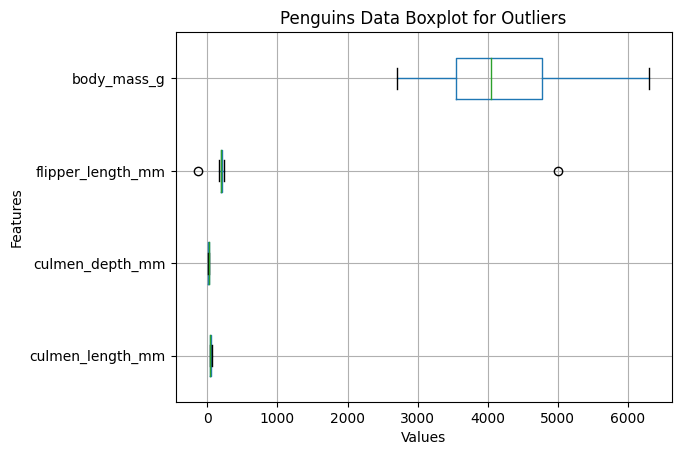

In [108]:
penguins_df.boxplot(vert=False)
plt.ylabel('Features')
plt.xlabel('Values')
plt.title('Penguins Data Boxplot for Outliers')

plt.show()

In [109]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.986826,17.173952,214.347305,4207.185629
std,5.461540,1.973277,263.648447,804.009294
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4768.750000
max,59.600000,21.500000,5000.000000,6300.000000


In [110]:
penguins_df[(penguins_df['flipper_length_mm']>300)|(penguins_df['flipper_length_mm']<0)]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
7,42.0,20.2,5000.0,4250.0,MALE
10,34.6,21.1,-132.0,4400.0,MALE


In [111]:
# Remove outliers.

outliers = penguins_df[(penguins_df['flipper_length_mm']>300)|(penguins_df['flipper_length_mm']<0)].index
penguins_df.drop(index=outliers, inplace=True)
penguins_df.reset_index(drop=True, inplace=True)

In [112]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


In [113]:
penguins_clean = penguins_df.copy()

penguins_clean.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE
5,38.9,17.8,181.0,3625.0,FEMALE
6,39.2,19.6,195.0,4675.0,MALE
7,41.1,17.6,182.0,3200.0,FEMALE
8,38.6,21.2,191.0,3800.0,MALE
9,36.6,17.8,185.0,3700.0,FEMALE


## Preprocess Data

- Pre-process the cleaned data using standard scaling and the one-hot encoding to add dummy variables:
    * Create the dummy variables and remove the original categorical feature from the dataset.
    * Scale the data using the standard scaling method.
    * Save the updated data as a new DataFrame called `penguins_preprocessed`.

In [114]:
numeric_features = penguins_clean[penguins_clean.select_dtypes(include='float').columns]
categorical_features = penguins_clean[penguins_clean.select_dtypes(include='object').columns]

In [115]:
numeric_features.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


In [116]:
categorical_features.head()

,sex
0,MALE
1,FEMALE
2,FEMALE
3,FEMALE
4,MALE


In [117]:
scaler = StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(numeric_features), columns=numeric_features.columns)
scaled_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-0.903906,0.790360,-1.425342,-0.566948
1,-0.830434,0.126187,-1.068577,-0.504847
2,-0.683490,0.432728,-0.426399,-1.187953
3,-1.344738,1.096901,-0.569105,-0.939551
4,-0.867170,1.761074,-0.783164,-0.691149
...,...,...,...,...
327,0.583904,-1.764152,0.929309,0.892415
328,0.510432,-1.457611,1.000662,0.799264
329,1.171681,-0.742347,1.500134,1.917074
330,0.216543,-1.202160,0.786603,1.233968


In [118]:
encoded_df = pd.get_dummies(categorical_features, dtype='int')
encoded_df

,sex_FEMALE,sex_MALE
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
327,1,0
328,1,0
329,0,1
330,1,0


In [119]:
penguins_preprocessed = pd.concat([scaled_df, encoded_df], axis=1)
penguins_preprocessed

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,0,1
1,-0.830434,0.126187,-1.068577,-0.504847,1,0
2,-0.683490,0.432728,-0.426399,-1.187953,1,0
3,-1.344738,1.096901,-0.569105,-0.939551,1,0
4,-0.867170,1.761074,-0.783164,-0.691149,0,1
...,...,...,...,...,...,...
327,0.583904,-1.764152,0.929309,0.892415,1,0
328,0.510432,-1.457611,1.000662,0.799264,1,0
329,1.171681,-0.742347,1.500134,1.917074,0,1
330,0.216543,-1.202160,0.786603,1.233968,1,0


## PCA

- Perform Principal Component Analysis (PCA) on the penguins_preprocessed dataset to determine the desired number of components, considering any component with an explained variance ratio above 10% as a suitable component. Save the number of components as a variable called `n_components`.
- Finally, execute PCA using n_components and store the result as `penguins_PCA`.

In [120]:
pca = PCA()
pca.fit(penguins_preprocessed)

PCA()

In [121]:
pca_trans = pca.transform(penguins_preprocessed)
pca_trans

array([[-1.75163190e+00,  6.36067786e-01, -5.59252720e-01,
         6.97386505e-01,  1.29729539e-01,  4.25965836e-16],
       [-1.40912063e+00, -6.24737236e-01, -1.66009332e-02,
         2.45250999e-02,  4.81162804e-01, -5.17723735e-16],
       [-1.46612793e+00, -4.34194838e-01,  3.08256395e-01,
        -4.89888910e-01, -2.83608831e-01, -7.36345253e-17],
       ...,
       [ 2.82351969e+00,  4.19245187e-01, -3.86361076e-01,
         8.69403929e-02,  1.96513753e-01, -2.40167979e-16],
       [ 1.59218365e+00, -1.10560629e+00, -1.79488487e-01,
        -2.10184524e-01,  5.52931849e-01, -7.95279491e-16],
       [ 2.09638295e+00,  5.11770830e-01, -1.80484948e-01,
         3.43126990e-01,  2.75583144e-01, -7.36345253e-17]])

In [122]:
pca.components_

array([[ 4.58291930e-01, -3.72611153e-01,  5.73309007e-01,
         5.53788202e-01, -8.87830075e-02,  8.87830075e-02],
       [ 3.60489524e-01,  7.37850498e-01, -2.97231416e-02,
         1.01775813e-01, -3.96473306e-01,  3.96473306e-01],
       [ 7.92951181e-01, -4.34933236e-02, -1.39437834e-01,
        -4.55586892e-01,  2.66771841e-01, -2.66771841e-01],
       [ 1.42638210e-01, -5.39266978e-01, -5.85237211e-01,
        -8.43206159e-03, -4.16096007e-01,  4.16096007e-01],
       [ 1.04396244e-01,  1.55038798e-01, -5.55416793e-01,
         6.89441655e-01,  3.01037195e-01, -3.01037195e-01],
       [ 0.00000000e+00, -7.36152291e-16,  1.30703369e-16,
        -8.64965671e-16,  7.07106781e-01,  7.07106781e-01]])

In [123]:
pca.n_components_

6

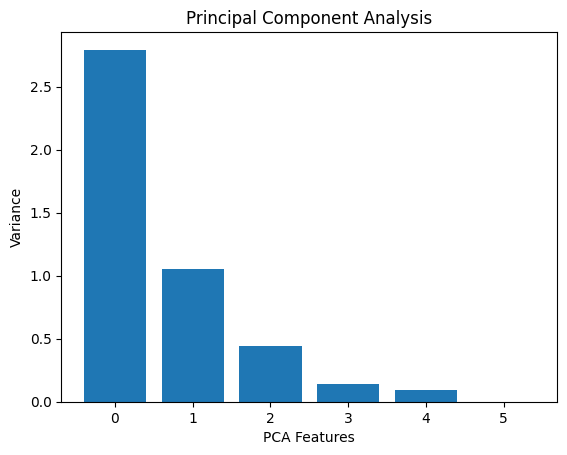

In [124]:
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA Features')
plt.ylabel('Variance')
plt.title('Principal Component Analysis')
plt.show()

In [125]:
pca.explained_variance_ratio_ >= 0.1

array([ True,  True, False, False, False, False])

In [126]:
# An explained variance ratio above 10% as a suitable component.

n_components = 2

In [127]:
adj_pca = PCA(n_components=n_components)
penguins_PCA = adj_pca.fit_transform(penguins_preprocessed)
penguins_PCA

array([[-1.75163190e+00,  6.36067786e-01],
       [-1.40912063e+00, -6.24737236e-01],
       [-1.46612793e+00, -4.34194838e-01],
       [-1.96090374e+00, -1.52984619e-01],
       [-1.79711009e+00,  1.33382478e+00],
       [-1.86067897e+00, -5.25195255e-01],
       [-7.05617100e-01,  1.06919635e+00],
       [-1.88882353e+00, -5.10760293e-01],
       [-1.82617727e+00,  1.53049634e+00],
       [-1.83907582e+00, -6.76492132e-01],
       [-1.65362034e+00, -1.37887582e-01],
       [-6.75782807e-01,  1.67600889e+00],
       [-2.43732720e+00, -6.41264585e-01],
       [-8.62515419e-01,  2.17777686e+00],
       [-2.48956893e+00, -4.23142371e-01],
       [-2.01356172e+00,  5.26526910e-01],
       [-1.93210585e+00, -1.90927735e-01],
       [-1.41198079e+00,  3.67090696e-01],
       [-1.49785055e+00,  5.91901221e-02],
       [-2.00731767e+00, -3.39505817e-01],
       [-1.66207385e+00,  6.68170013e-01],
       [-1.79190465e+00, -4.48002476e-01],
       [-2.79202883e+00, -3.30790004e-01],
       [-1.

## KMeans Cluster

- Employ k-means clustering on the penguins_PCA dataset, setting random_state=42, to determine the number of clusters through elbow analysis. Save the optimal number of clusters in a variable called n_cluster.

- Create and fit a new k-means cluster model, setting n_cluster equal to your n_cluster variable, saving the model as a variable called kmeans.
    * Visualize your clusters using the first two principle components.

In [128]:
num_clusters = range(1,10)
inertias = []

for cluster in num_clusters:
    kmeans = KMeans(n_clusters=cluster, random_state=42)
    kmeans.fit(penguins_PCA)
    inertias.append(kmeans.inertia_)

print(inertias)

[1272.2897698695947, 496.16256220453397, 292.1874973860062, 168.34950000781095, 116.20930051919288, 95.45638967289594, 82.73845225083029, 72.2359543387713, 65.10554303592775]


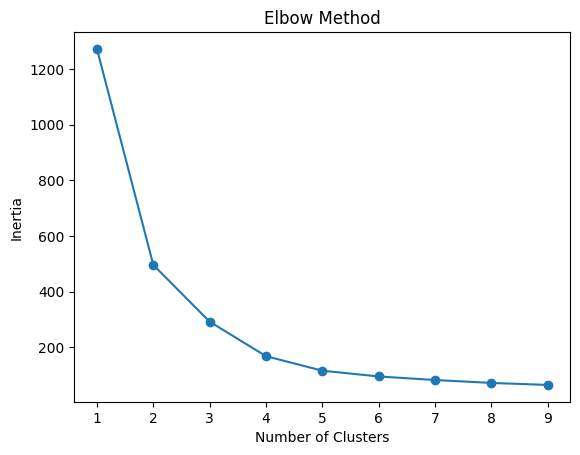

In [129]:
plt.plot(num_clusters, inertias, '-o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [130]:
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(penguins_PCA)

kmeans.labels_

array([0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 3, 1, 3, 3, 1, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 3, 1, 3,
       3, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,

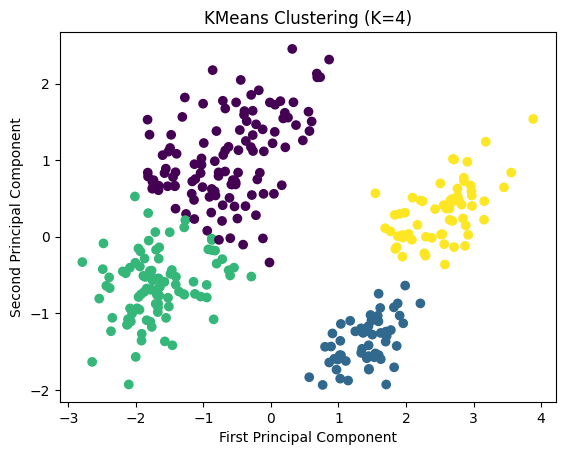

In [131]:
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering (K=4)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

## Statistical Table

- Add the label column extracted from the k-means clustering (using kmeans.labels_) to the penguins_clean DataFrame.
- Create a statistical table by grouping penguins_clean based on the "label" column and calculating the mean of each numeric column. Save this table as stat_penguins.

In [135]:
penguins_clean['label'] = kmeans.labels_

penguins_clean.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,39.1,18.7,181.0,3750.0,MALE,0
1,39.5,17.4,186.0,3800.0,FEMALE,2
2,40.3,18.0,195.0,3250.0,FEMALE,2
3,36.7,19.3,193.0,3450.0,FEMALE,2
4,39.3,20.6,190.0,3650.0,MALE,0


In [141]:
stat_penguins = penguins_clean.groupby('label')[numeric_features.columns].mean().reset_index()

stat_penguins

,label,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,44.591453,19.048718,195.119658,3980.982906
1,1,45.563793,14.237931,212.706897,4679.741379
2,2,38.929167,17.515625,187.958333,3383.072917
3,3,49.473770,15.718033,221.540984,5484.836066
